# Using the HR data predict an employee is resigning

In [1]:
import pandas as pd # Importing pandas library to perform operation on dataframe
import numpy as np
import matplotlib.pyplot as plt # Importing matplotlib to visualise data points
import seaborn as sns
import streamlit as st
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Importing logistic regression model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Importing train-test split from sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [5]:
data = pd.read_csv('C:\\users\\sameer\\Desktop\\Datasets\\hrdata.csv') # Importing dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.describe() # Statistical information about the variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
data.info() # Checking data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.groupby(data.left).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>],
       [<AxesSubplot:title={'center':'number_project'}>,
        <AxesSubplot:title={'center':'average_montly_hours'}>],
       [<AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:>]], dtype=object)

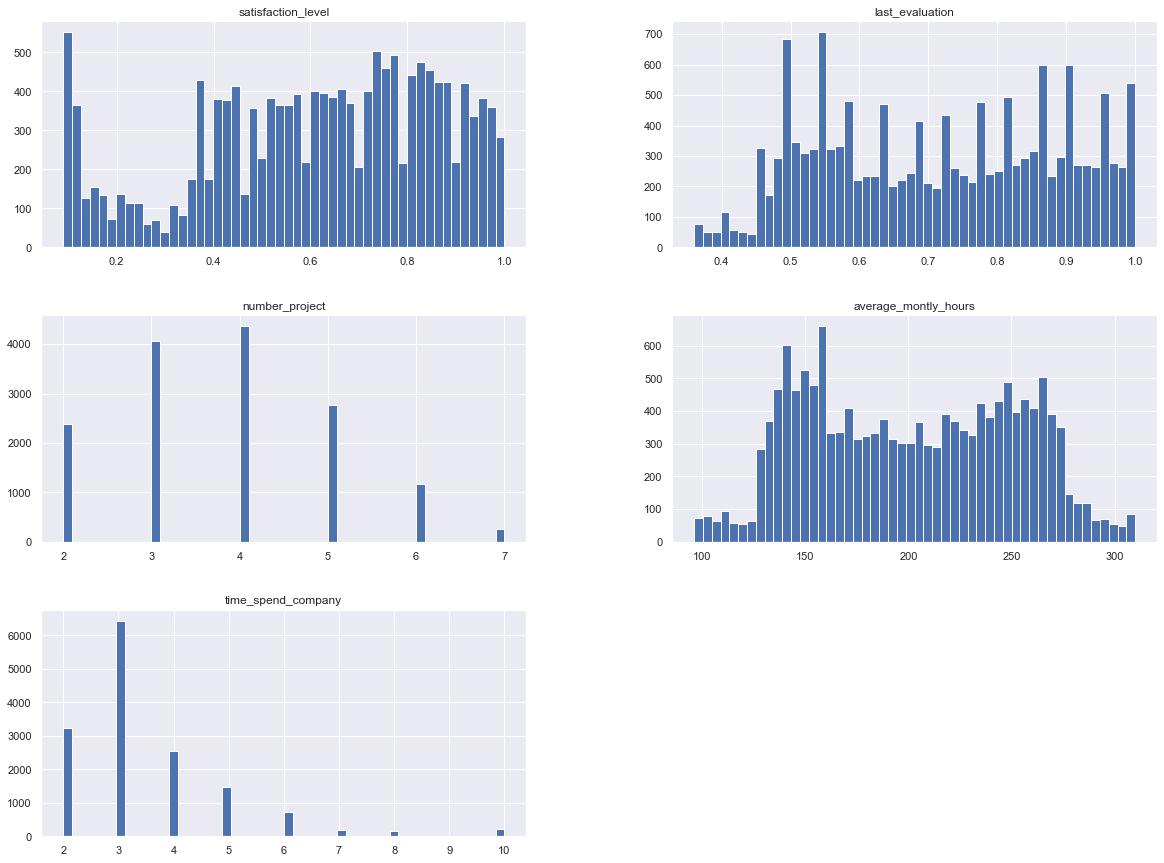

In [10]:
df = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']]
df.hist(bins = 50, figsize=(20,15))

### Satisfaction level, average monthly hours seems to be little impactful and promotion seems to be bigger

2021-03-30 15:52:23.717 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='salary'>

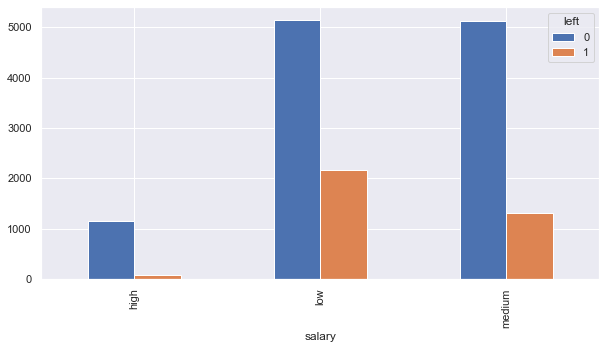

In [11]:
# Impact of salary on employee retention
pd.crosstab(data.salary,data.left).plot(kind = 'bar',figsize = (10,5))

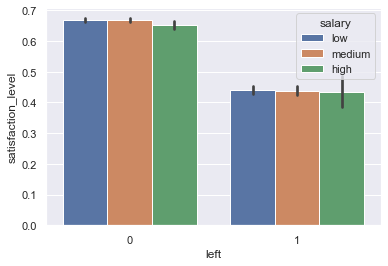

In [12]:
# graph shows high salaries are not likely to leave company
ax = sns.barplot(x="left", y="satisfaction_level", hue="salary", data=data)

<AxesSubplot:xlabel='Department'>

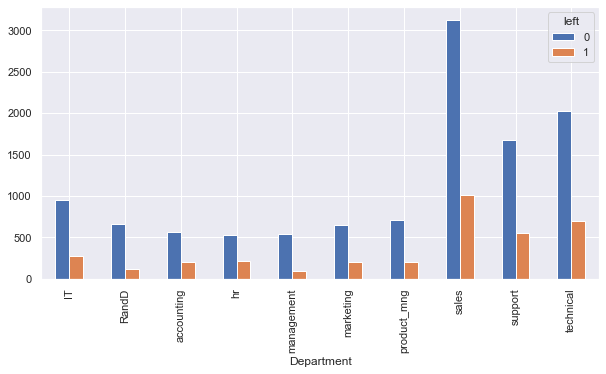

In [13]:
# impact of department on employee retention
pd.crosstab(data.Department,data.left).plot(kind = 'bar',figsize = (10,5))

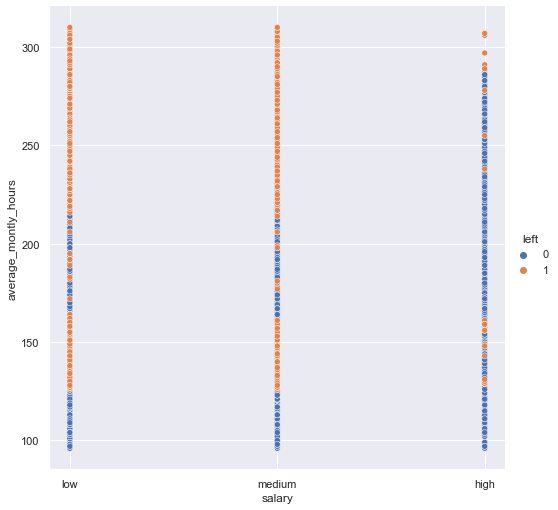

In [14]:
# Dynamic relationship between average_montly_hours, salary, left
sns.relplot(x="salary", y="average_montly_hours", hue="left", data=data,height = 7);

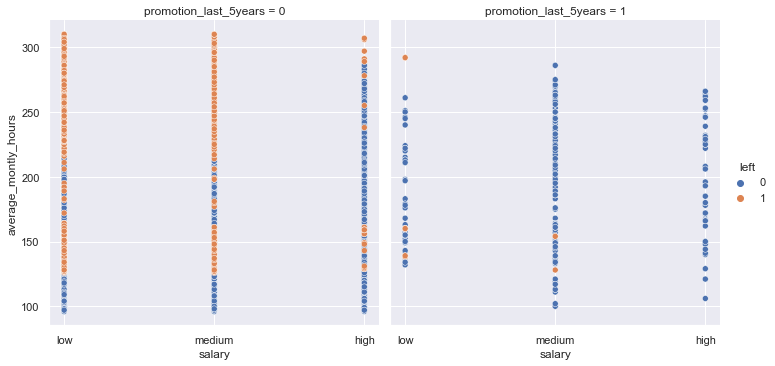

In [15]:
# Dynamic relationship between average_montly_hours, salary, left and promotion_last_5years
sns.relplot(x="salary", y="average_montly_hours", hue="left",
            col="promotion_last_5years", data=data);

### From exploratory data analysis we can conclude important variables as 
#### Satisfaction level
#### Average working hours
#### Promotion
#### Salary

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
def data_split(dataframe):
    X = dataframe.drop(columns = ['left'], axis = 1) # Independent variables
    y = dataframe.left # Dependent Variable
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)
    
    return  X_train, X_test, y_train, y_test

In [19]:
def preprocessing(X):
    X_dummy = pd.get_dummies(X, drop_first= True)
    scale = StandardScaler()
    X_scaled = scale.fit_transform(X_dummy)
    
    return X_scaled

In [20]:
X_train, X_test, y_train, y_test = data_split(data)
X_train_scaled = preprocessing(X_train)
oversample = SMOTE() # Over representation of minority class to handle imbalance
X_train, y_train = oversample.fit_resample(X_train_scaled, y_train)

In [21]:
# Parameter Grid
model_params = {
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,10,20],
            'gamma':[1.0,1.5,2.0]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[20, 50, 75],
            'max_depth':[4,5,6]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,10,20],
            'solver':['lbfgs', 'liblinear']
        }
    },
    'nb_G':{
        'model':GaussianNB(),
        'params':{
            'var_smoothing':[1e-09,1e-08,1e-07]
        }
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[3,4]
        }
    }
}

In [22]:
# Appending the score in a list after fitting the model to each parameter for best result
scores = []
for model_name,mp in model_params.items(): # Iteration of items in the dictionary above
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False, iid = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':model_name,
        'best':clf.best_score_, # Best score of the model
        'best_param':clf.best_params_  # Best parameter combination of the model
    })

scores

[{'model': 'svm',
  'best': 0.9840540548406906,
  'best_param': {'C': 10, 'gamma': 1.5}},
 {'model': 'random_forest',
  'best': 0.956397449965122,
  'best_param': {'max_depth': 6, 'n_estimators': 50}},
 {'model': 'logistic_regression',
  'best': 0.7745737345631402,
  'best_param': {'C': 1, 'solver': 'lbfgs'}},
 {'model': 'nb_G',
  'best': 0.6693040764273123,
  'best_param': {'var_smoothing': 1e-09}},
 {'model': 'Decision_tree',
  'best': 0.9406380520232727,
  'best_param': {'criterion': 'gini', 'max_depth': 4}}]

In [23]:
model = LogisticRegression(solver = 'liblinear')
model_fit = model.fit(X_train, y_train) # fitting the model
model_fit.score(preprocessing(X_test),y_test) # model score

0.7742222222222223

In [24]:
cv = ShuffleSplit(n_splits = 5,test_size = 0.3,random_state = 100)
cross_val_score(LogisticRegression(solver = 'liblinear'),X_train, y_train,cv=cv)

array([0.76873573, 0.7720573 , 0.77600166, 0.77911563, 0.77953083])

In [25]:
cross_val_score(SVC(kernel = 'rbf', C=1, gamma = 'auto'),X_train, y_train,cv = 5)

array([0.93958268, 0.9408284 , 0.94331984, 0.94518841, 0.94766355])

In [26]:
cross_val_score(RandomForestClassifier(n_estimators =1,max_depth = 3),
                X_train, y_train,cv = 5)

array([0.85393958, 0.69417627, 0.79632513, 0.68016194, 0.80155763])

In [28]:
cross_val_score(SVC(C=10, gamma = 2.5),X_train, y_train,cv = 5)

array([0.97633136, 0.98224852, 0.98473996, 0.98691996, 0.98753894])

In [29]:
svm_model = SVC(C = 10, gamma = 2.5)
svm_model.fit(X_train, y_train)
y_hat = svm_model.predict(preprocessing(X_test))

In [30]:
yhat = model.predict(preprocessing(X_test))

In [31]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels = [1,0])
cnf_matrix

array([[1024,   75],
       [  44, 3357]], dtype=int64)

Text(21.5, 0.5, 'Truth')

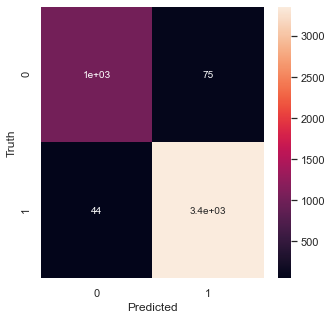

In [32]:
plt.figure(figsize = (5,5))
sns.heatmap(cnf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
f_score = f1_score(y_test, y_hat)
f_score

0.9450853714813106

In [34]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3401
           1       0.96      0.93      0.95      1099

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [35]:
department_columns = data.Department.unique()
salary_columns = data.salary.unique()

In [36]:
import pickle
with open ('employee_resignation_prediction.pickle','wb') as f:
    pickle.dump(svm_model,f)

In [84]:
Independent = emp_raw.drop(columns = ['left'], axis = 1)
Dependent = emp_raw.left
d_data = pd.get_dummies(Independent, prefix= None,drop_first=True)
X_train_f,X_test_f,y_train_f,y_test_f = train_test_split(d_data,Dependent,test_size = 0.3, random_state = 100)

<AxesSubplot:>

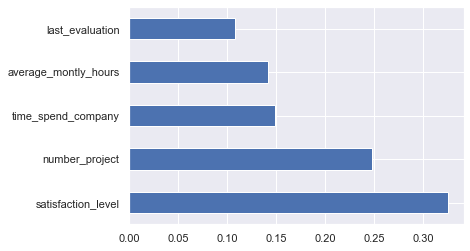

In [102]:
feature_model = RandomForestClassifier(max_depth= 6, n_estimators= 50)
features = feature_model.fit(X_train_f, y_train_f)
feature_importance = pd.Series(features.feature_importances_, index = X_train_f.columns)
feature_importance.nlargest(5).plot(kind = 'barh')

Text(0, 0.5, 'Feature Importance')

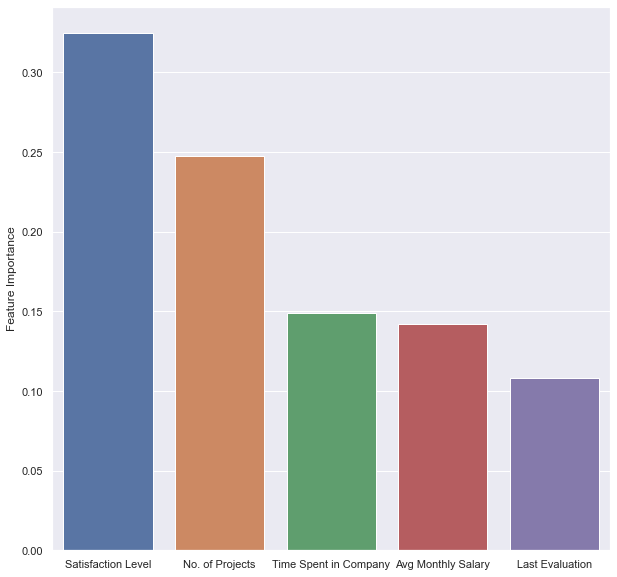

In [110]:
plt.figure(figsize = (10,10))
f_x = ['Satisfaction Level','No. of Projects','Time Spent in Company',
       'Avg Monthly Salary','Last Evaluation']
plotting_y = feature_importance.nlargest(5)
plotting_y = sorted(plotting_y,reverse=True)
sns.barplot(f_x,plotting_y)
plt.ylabel('Feature Importance')